<a href="https://colab.research.google.com/github/yblee110/smol-course-modulabs/blob/main/study/yblee110/5_vision_language_models/notebooks/vlm_finetuning_yblee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers datasets trl huggingface_hub bitsandbytes

# Authenticate to Hugging Face
from huggingface_hub import login
login()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import torch
import os
from transformers import AutoProcessor, AutoModelForVision2Seq, BitsAndBytesConfig
from transformers.image_utils import load_image

In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps" if torch.backends.mps.is_available() else "cpu"
)

quantization_config = BitsAndBytesConfig(load_in_4bit=True,
                                         bnb_4bit_use_double_quant=True,
                                         bnb_4bit_quant_type="nf4",
                                         bnb_4bit_compute_dtype=torch.bfloat16)
model_name = "HuggingFaceTB/SmolVLM-Instruct"
model = AutoModelForVision2Seq.from_pretrained(
    model_name,
    quantization_config=quantization_config,
    torch_dtype=torch.bfloat16,
).to(device)
processor = AutoProcessor.from_pretrained("HuggingFaceTB/SmolVLM-Instruct")

# Set our name for the finetune to be saved &/ uploaded to
finetune_name = "SmolVLM-FT-MyDataset"
finetune_tags = ["smol-course", "module_5"]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

`low_cpu_mem_usage` was None, now default to True since model is quantized.


model.safetensors:   0%|          | 0.00/4.49G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/136 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/429 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/486 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/4.48k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/801k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.52M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/92.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.07k [00:00<?, ?B/s]

Some kwargs in processor config are unused and will not have any effect: image_seq_len. 


In [ ]:
from datasets import load_dataset

# TODO: define your dataset and config using the path and name parameters
dataset_name = "HuggingFaceM4/ChartQA"
ds = load_dataset(path=dataset_name)
ds

README.md:   0%|          | 0.00/852 [00:00<?, ?B/s]

(…)-00000-of-00003-49492f364babfa44.parquet:   0%|          | 0.00/219M [00:00<?, ?B/s]

(…)-00001-of-00003-7302bae5e425bbc7.parquet:   0%|          | 0.00/311M [00:00<?, ?B/s]

(…)-00002-of-00003-194c9400785577a2.parquet:   0%|          | 0.00/315M [00:00<?, ?B/s]

(…)-00000-of-00001-0f11003c77497969.parquet:   0%|          | 0.00/50.2M [00:00<?, ?B/s]

(…)-00000-of-00001-e2cd0b7a0f9eb20d.parquet:   0%|          | 0.00/68.9M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/28299 [00:00<?, ? examples/s]

Generating val split:   0%|          | 0/1920 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2500 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'query', 'label', 'human_or_machine'],
        num_rows: 28299
    })
    val: Dataset({
        features: ['image', 'query', 'label', 'human_or_machine'],
        num_rows: 1920
    })
    test: Dataset({
        features: ['image', 'query', 'label', 'human_or_machine'],
        num_rows: 2500
    })
})

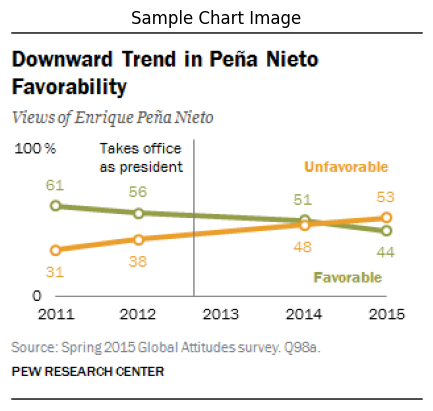

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=314x281 at 0x7E1BDF59A690>, 'query': 'What is the sum favourable  value in the year 2014 and 2015?', 'label': ['95'], 'human_or_machine': 0, 'image_size': ((314, 281),)}
Query: What is the sum favourable  value in the year 2014 and 2015?
Expected Answer: 95
Model Prediction: User:<image>What is the sum favourable  value in the year 2014 and 2015?
Answer: 91.


In [ ]:
import matplotlib.pyplot as plt
sample = ds['train'][3]

# Display the structure of a single sample
sample['image_size'] = sample['image'].size,

# Visualize the image and related metadata
plt.imshow(sample['image'])
plt.axis("off")
plt.title("Sample Chart Image")
plt.show()

print(sample)

# Preprocess the sample
prompt = [{"role": "user", "content": [{"type": "image"}, {"type": "text", "text": sample["query"]}]}]
formatted_query = processor.apply_chat_template(prompt, tokenize=False)

inputs = processor(
    images=sample["image"],
    text=formatted_query,
    return_tensors="pt"
).to(device)
inputs = {key: val.to(device, dtype=torch.bfloat16) if val.dtype == torch.float else val.to(device) for key, val in inputs.items()}

# Generate predictions
with torch.no_grad():
    outputs = model.generate(**inputs,
                             max_length=1600)

# Decode the prediction
prediction = processor.batch_decode(outputs, skip_special_tokens=True)

# Display the result
print(f"Query: {sample['query']}")
print(f"Expected Answer: {sample['label'][0]}")
print(f"Model Prediction: {prediction[0]}")

In [ ]:
from peft import LoraConfig, get_peft_model

# Configure LoRA
peft_config = LoraConfig(
    lora_alpha=16,
    lora_dropout=0.05,
    r=8,
    bias="none",
    target_modules=["q_proj", "v_proj"],
    task_type="CAUSAL_LM",
)

# Apply PEFT model adaptation
peft_model = get_peft_model(model, peft_config)

# Print trainable parameters
peft_model.print_trainable_parameters()

trainable params: 2,568,192 || all params: 2,248,841,072 || trainable%: 0.1142


In [ ]:
def collate_fn(examples):
    # System message template for the VLM
    system_message = """You are a Vision Language Model specialized in interpreting visual data from chart images.
    Your task is to analyze the provided chart image and respond to queries with concise answers, usually a single word, number, or short phrase.
    The charts include a variety of types (e.g., line charts, bar charts) and contain colors, labels, and text.
    Focus on delivering accurate, succinct answers based on the visual information. Avoid additional explanation unless absolutely necessary."""

    # Initialize lists for text and image inputs
    text_inputs = []
    image_inputs = []

    # Process all examples in one loop
    for example in examples:
        # Format the chat structure for the processor
        formatted_example = {
            "messages": [
                {
                    "role": "system",
                    "content": [{"type": "text", "text": system_message}],
                },
                {
                    "role": "user",
                    "content": [
                        {
                            "type": "image",
                        },
                        {
                            "type": "text",
                            "text": example["query"],
                        },
                    ],
                },
            ]
        }
        # Apply chat template and strip extra spaces
        text_inputs.append(processor.apply_chat_template(formatted_example["messages"], tokenize=False).strip())

        # Ensure images are in RGB mode
        image = example["image"]
        if image.mode != 'RGB':
            image = image.convert('RGB')
        image_inputs.append( [image] )

    # Tokenize the texts and process the images
    batch = processor(
        text=text_inputs,
        images=image_inputs,
        return_tensors="pt",
        padding=True
    )

    # Clone input IDs for labels
    labels = batch["input_ids"].clone()
    labels[labels == processor.tokenizer.pad_token_id] = -100  # Mask padding tokens in labels

    # Ensure image_token is converted to string if it is an AddedToken
    # In some processor, processor.image_token return a list for each image.
    # TODO: AutoProcessor.from_pretrained("HuggingFaceTB/SmolVLM-Instruct") only have one ?
    image_token_id = processor.tokenizer.convert_tokens_to_ids(str(processor.image_token))

    # Mask image token IDs in the labels
    labels[labels == image_token_id] = -100

    # Add labels back to the batch
    batch["labels"] = labels


    return batch

In [ ]:
from trl import SFTConfig, SFTTrainer

# Configure the Trainer
training_args = SFTConfig(
    output_dir="sft_output",  # Directory to save the model
    num_train_epochs=3,                     # number of training epochs
    per_device_train_batch_size=1,          # batch size per device during training
    gradient_accumulation_steps=16,         # number of steps before performing a backward/update pass
    gradient_checkpointing=True,            # use gradient checkpointing to save memory
    optim="adamw_torch_fused",              # use fused adamw optimizer
    logging_steps=5,                        # log every 10 steps
    save_strategy="epoch",                  # save checkpoint every epoch
    learning_rate=2e-4,                     # learning rate, based on QLoRA paper
    bf16=True,                              # use bfloat16 precision
    tf32=True,                              # use tf32 precision
    max_grad_norm=0.3,                      # max gradient norm based on QLoRA paper
    warmup_ratio=0.03,                      # warmup ratio based on QLoRA paper
    lr_scheduler_type="constant",           # use constant learning rate scheduler
    push_to_hub=True,                       # push model to hub
    gradient_checkpointing_kwargs = {"use_reentrant": False}, # use reentrant checkpointing
    # dataloader_num_workers=16,
    dataset_text_field="", # need a dummy field for collator
    dataset_kwargs = {"skip_prepare_dataset": True}, # important for collator
    remove_unused_columns = False                    # necessary else features except label will be removed
)
# Initialize the Trainer
trainer = SFTTrainer(
    model=model,
    args=training_args,
    train_dataset=ds["train"],
    eval_dataset=ds["test"],
    data_collator=collate_fn,
    peft_config=peft_config,
    tokenizer=processor.tokenizer,
)

<ipython-input-9-7989838e42a2>:27: FutureWarning: `tokenizer` is deprecated and removed starting from version 0.16.0 for `SFTTrainer.__init__`. Use `processing_class` instead.
  trainer = SFTTrainer(


In [ ]:
# Train the model
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: dudqls4019 (modulabs_aiffel) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...


Step,Training Loss
